In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('student-mat.csv', sep = ';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### DataPreparation

* Recode Names;
* Check For NaN values/missing values;
* Check for duplicates;
* Visualize data;



In [4]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

There's no need of recode names as they are in a good shape.

In [5]:
#Python any() function accepts iterable (list, tuple, dictionary etc.) as an argument and 
#return true if any of the element in iterable is true, else it returns false. 
#If iterable is empty then any() method returns false.

(data.astype(np.object) == '?').any() #Check for ? values 

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [6]:
(data.astype(np.object) == '').any() # Check for '' values

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [7]:
data.isnull().any() # Check for None and NaN values

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

As the type of the variables is correct, there's no need to cast them.

In [8]:
# Each row of data does not has a unique ID to be recognized. So, instead of using the unique function to
#find likely duplicates, I'll use the pandas duplicated function:

duplicated = data[data.duplicated()]
duplicated

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


There are no duplicated rows in this dataset. 

### Feature Enginering

Let's see how each categorial variable has its values distributed:



In [9]:
cat_col = list()
[cat_col.append(i) for i in data.columns if(data[i].dtypes == np.object)] #get the categorial features

for col in cat_col:
    print(data[col].value_counts())

GP    349
MS     46
Name: school, dtype: int64
F    208
M    187
Name: sex, dtype: int64
U    307
R     88
Name: address, dtype: int64
GT3    281
LE3    114
Name: famsize, dtype: int64
T    354
A     41
Name: Pstatus, dtype: int64
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64
mother    273
father     90
other      32
Name: guardian, dtype: int64
no     344
yes     51
Name: schoolsup, dtype: int64
yes    242
no     153
Name: famsup, dtype: int64
no     214
yes    181
Name: paid, dtype: int64
yes    201
no     194
Name: activities, dtype: int64
yes    314
no      81
Name: nursery, dtype: int64
yes    375
no      20
Name: higher, dtype: int64
yes    329
no      66
Name: internet, dtype: int64
no     263
yes    132
Name: romantic, 

In [10]:
def plot_box(col,data):
    sns.set_style("whitegrid")
    sns.boxplot(col, data['G3'], data=data)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel('G3')# Set text for y axis
    plt.show()

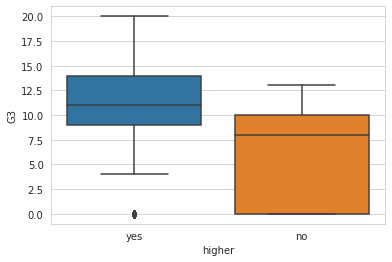

In [11]:
plot_box('higher',data)

As we can see above, there's no need to agregate variables because in each of them the values are distributed quite well. The boxplot just shows the distribuition of the variable "higher", which is a good candidate to predict the "G3" variable. This analysis is going to be done later. 

Now, let's see how the predicted variable "G3" behave: 

Text(0, 0.5, 'Density')

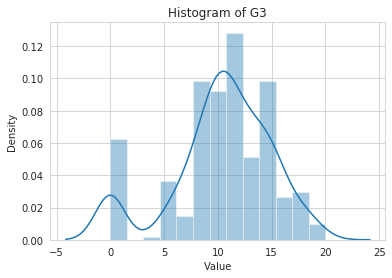

In [12]:
sns.distplot(data['G3'])
plt.title('Histogram of G3')
plt.xlabel('Value')
plt.ylabel('Density')
    

The distribuition is quite good. There's no much skewing and it doesnt seem be multimodal.



#### Visualizing the data

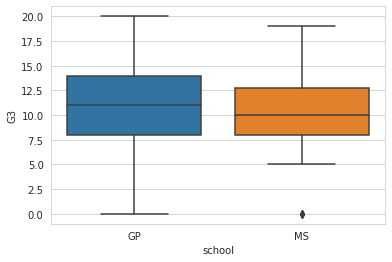

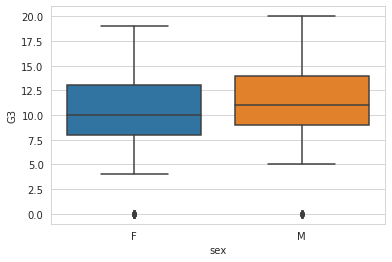

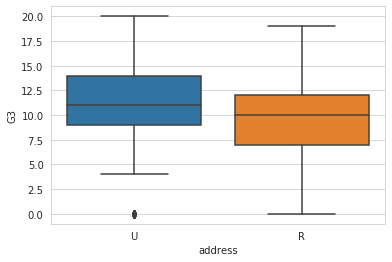

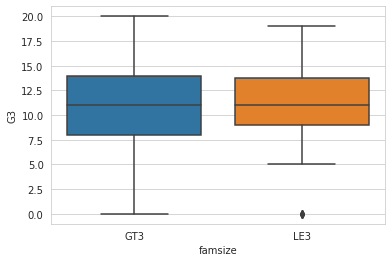

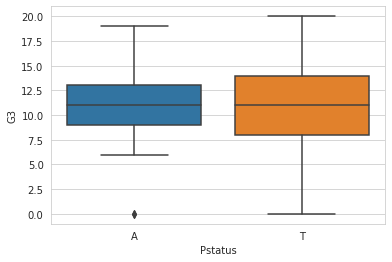

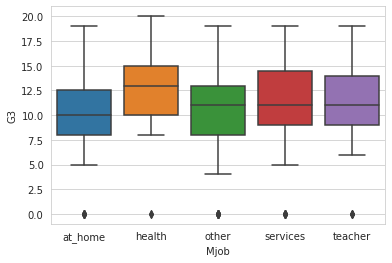

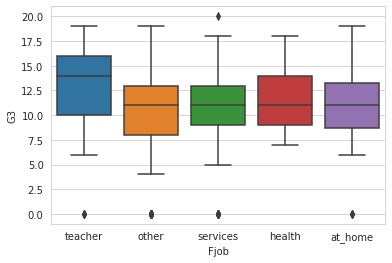

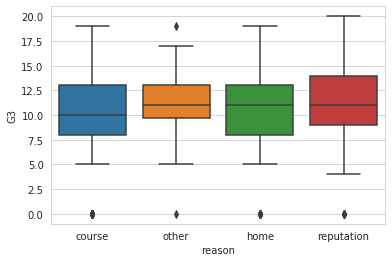

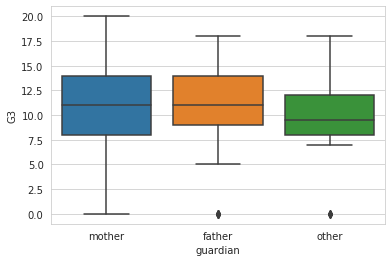

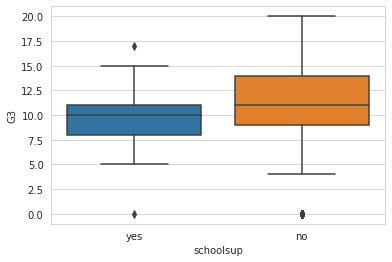

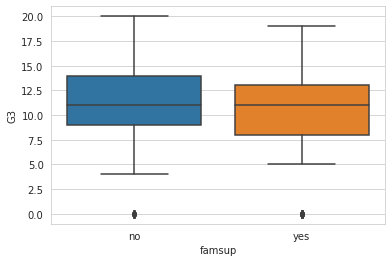

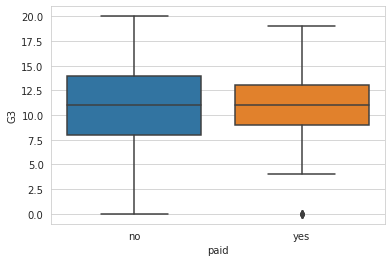

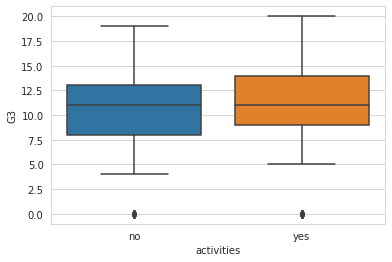

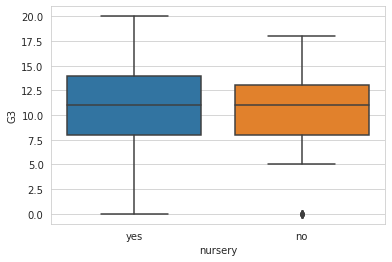

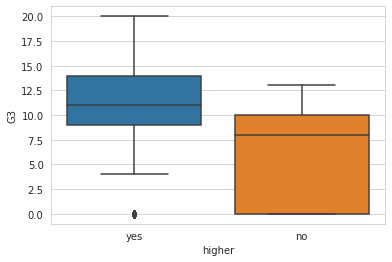

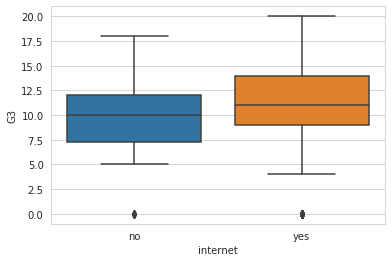

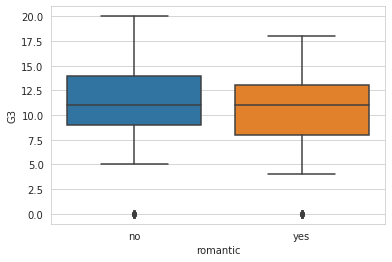

In [13]:
# Categorial Variables vs G3:

for col in cat_col:
    plot_box(col, data)

Here, the "higher" variable shows the differences on the G3 for each of the categories. As a categorical variable, it may be useful to the prediction.

In [14]:
#Numerical Variables: 

num_cols = list()
[num_cols.append(i) for i in data.columns if(data[i].dtypes != 'object')] #get the numerical features
num_cols.remove('G3')

In [15]:
def scatter_plot(data, num_cols, target):
    for col in num_cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        data.plot.scatter(x = col, y = target, ax = ax)
        ax.set_title('Scatter plot of ' + target + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(target)# Set text for y axis
        plt.show()

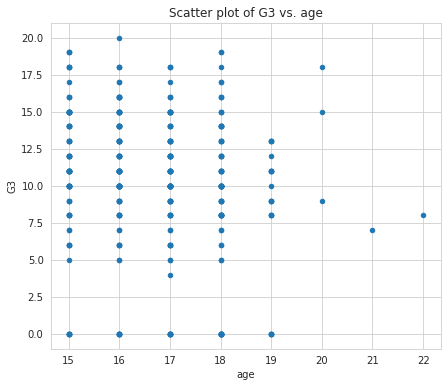

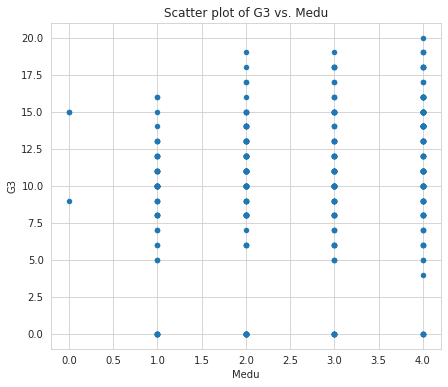

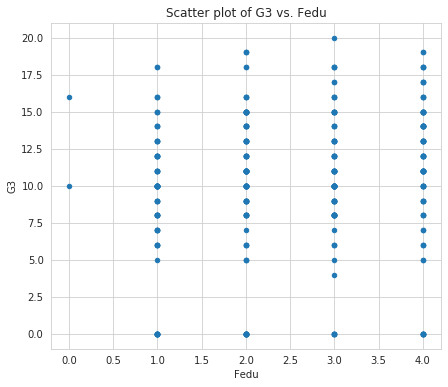

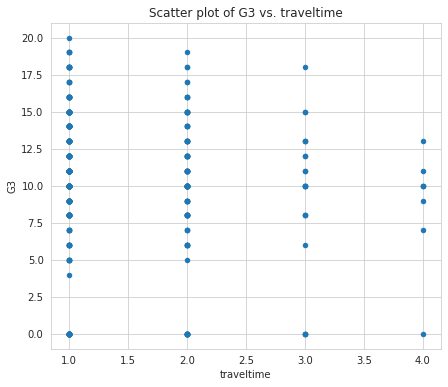

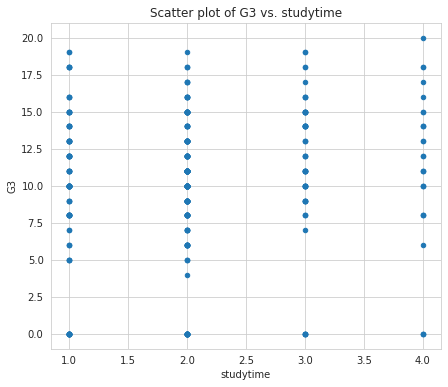

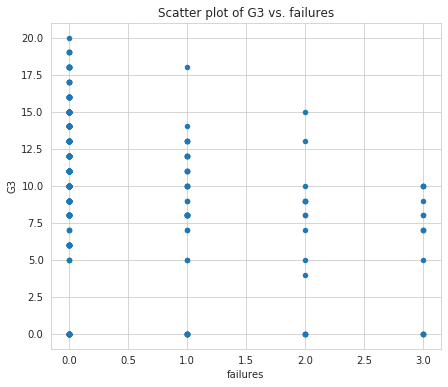

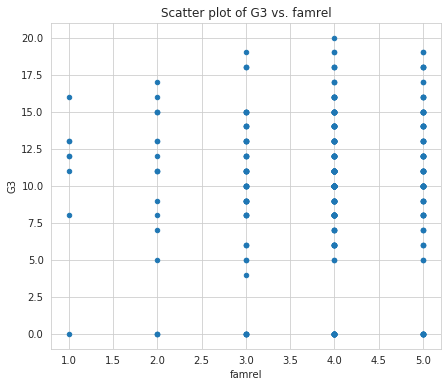

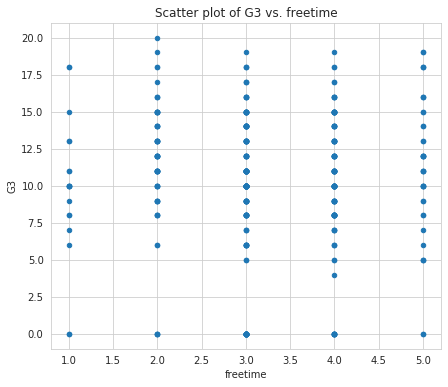

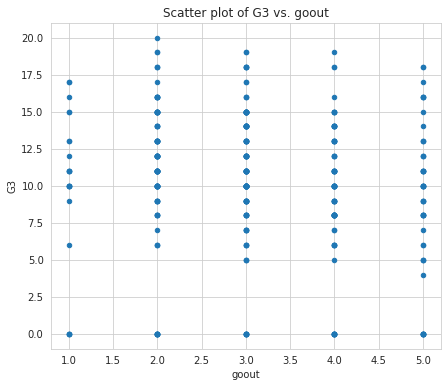

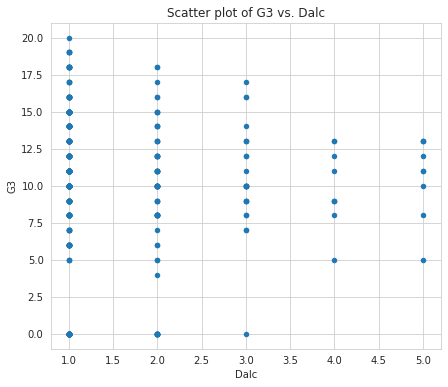

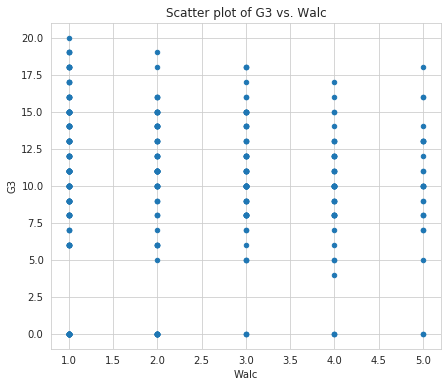

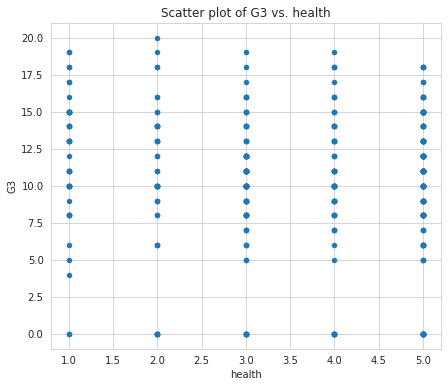

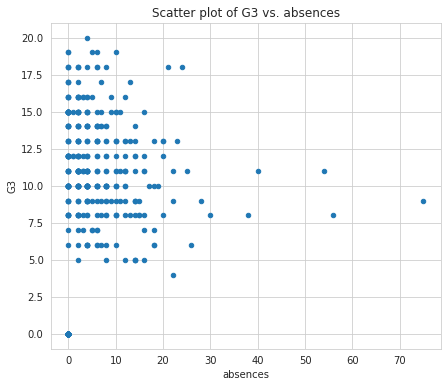

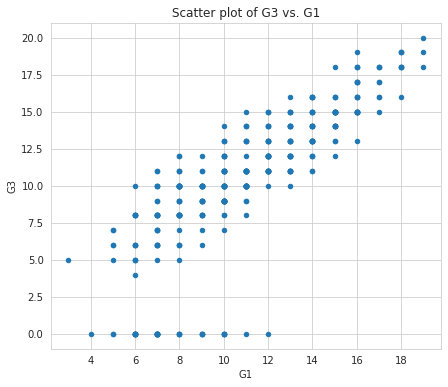

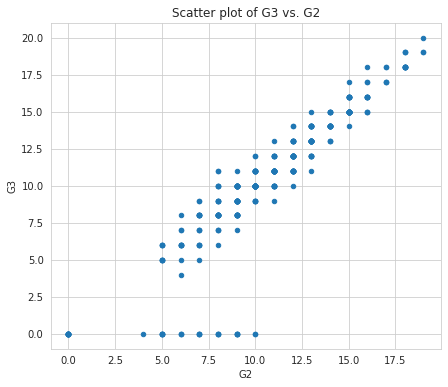

In [16]:
scatter_plot(data,num_cols, 'G3')

From the scatter plots G1 and G2 are both useful to predict the G3 variable. It seems that G2 and G3 are colinear. Let's try to visualize it:

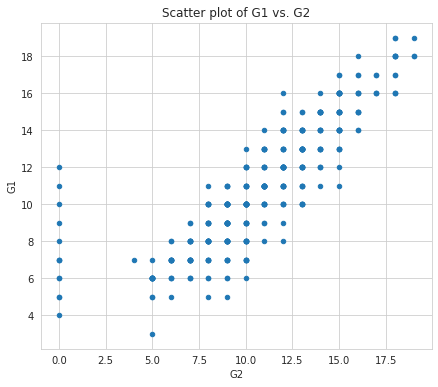

In [17]:
scatter_plot(data, ['G2'], 'G1')

G1 and G2 are collinear, so they won't be used in the same machine learning model. 

Now, let's encode the categorical variable "higher" in dummy variables to be able to work with it on our model matrix

In [18]:
from sklearn import preprocessing

print(data['higher'].unique())
to_numerical = data['higher']
encoder = preprocessing.LabelEncoder()

encoder.fit(to_numerical)

numerical = encoder.transform(to_numerical)

print(numerical)

['yes' 'no']
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [19]:
one_hot = preprocessing.OneHotEncoder()
Features = one_hot.fit(numerical.reshape(-1,1)).transform(numerical.reshape(-1,1))
Features = Features.toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [20]:
Features = np.concatenate([Features, np.array(data[['G1']])], axis = 1)

In [21]:
Features[0:5,0:3]

array([[ 0.,  1.,  5.],
       [ 0.,  1.,  5.],
       [ 0.,  1.,  7.],
       [ 0.,  1., 15.],
       [ 0.,  1.,  6.]])

In [22]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(Features, data[['G3']], test_size = 0.33, random_state = 42)
X_train

array([[ 0.,  1., 13.],
       [ 0.,  1., 14.],
       [ 0.,  1.,  6.],
       [ 0.,  1., 18.],
       [ 0.,  1., 16.],
       [ 1.,  0.,  7.],
       [ 0.,  1., 11.],
       [ 0.,  1., 15.],
       [ 0.,  1., 13.],
       [ 0.,  1., 10.],
       [ 0.,  1., 11.],
       [ 0.,  1., 11.],
       [ 0.,  1., 15.],
       [ 0.,  1.,  7.],
       [ 0.,  1.,  9.],
       [ 0.,  1., 13.],
       [ 0.,  1., 12.],
       [ 0.,  1., 10.],
       [ 0.,  1., 15.],
       [ 1.,  0.,  6.],
       [ 0.,  1., 10.],
       [ 0.,  1.,  7.],
       [ 0.,  1.,  7.],
       [ 0.,  1., 11.],
       [ 0.,  1., 12.],
       [ 0.,  1., 13.],
       [ 0.,  1.,  9.],
       [ 0.,  1., 13.],
       [ 1.,  0., 10.],
       [ 0.,  1., 10.],
       [ 0.,  1.,  8.],
       [ 0.,  1.,  7.],
       [ 0.,  1., 10.],
       [ 0.,  1., 16.],
       [ 0.,  1.,  7.],
       [ 0.,  1., 16.],
       [ 0.,  1., 14.],
       [ 0.,  1., 11.],
       [ 0.,  1., 14.],
       [ 0.,  1., 16.],
       [ 0.,  1.,  8.],
       [ 0.,  1.

Rescaling Numeric Features

In [23]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-0.23664319,  0.23664319,  0.61153761],
       [-0.23664319,  0.23664319,  0.92502485],
       [-0.23664319,  0.23664319, -1.58287308],
       [-0.23664319,  0.23664319,  2.17897382],
       [-0.23664319,  0.23664319,  1.55199933],
       [ 4.22577127, -4.22577127, -1.26938584],
       [-0.23664319,  0.23664319, -0.01543687],
       [-0.23664319,  0.23664319,  1.23851209],
       [-0.23664319,  0.23664319,  0.61153761],
       [-0.23664319,  0.23664319, -0.32892411],
       [-0.23664319,  0.23664319, -0.01543687],
       [-0.23664319,  0.23664319, -0.01543687],
       [-0.23664319,  0.23664319,  1.23851209],
       [-0.23664319,  0.23664319, -1.26938584],
       [-0.23664319,  0.23664319, -0.64241135],
       [-0.23664319,  0.23664319,  0.61153761],
       [-0.23664319,  0.23664319,  0.29805037],
       [-0.23664319,  0.23664319, -0.32892411],
       [-0.23664319,  0.23664319,  1.23851209],
       [ 4.22577127, -4.22577127, -1.58287308],
       [-0.23664319,  0.23664319, -0.328

Building the Linear Model

In [24]:
from sklearn import linear_model

l = linear_model.LinearRegression(fit_intercept = False).fit(X_train,y_train)
l.intercept_


0.0

In [25]:
l.coef_

array([[-1.0419997e+15, -1.0419997e+15,  3.5000000e+00]])

#### Model Evaluation

In [26]:
from sklearn import metrics 
import math

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = metrics.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(metrics.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(metrics.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(metrics.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(metrics.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))

y_predicted = l.predict(X_test) 
print_metrics(y_test, y_predicted, 28)    

Mean Square Error      = 122.23188167150663
Root Mean Square Error = 11.055852824251353
Mean Absolute Error    = 10.64069194224794
Median Absolute Error  = 11.304029050999059
R^2                    = -4.545096597701001
Adjusted R^2           = -5.998665608748836


Ok. It was catastrophic. Let's see how it works without the "higher" variable. 

In [27]:
X_train, X_test, y_train,y_test = train_test_split(data[['G2']], data[['G3']], test_size = 0.33, random_state = 42)

l = linear_model.LinearRegression().fit(X_train,y_train)
l.intercept_


array([-1.429943])

In [28]:
l.coef_

array([[1.10582834]])

In [38]:
y_predicted = l.predict(X_test)
print_metrics(y_test,y_predicted,8)


Mean Square Error      = 4.376661555579927
Root Mean Square Error = 2.0920472163839725
Mean Absolute Error    = 1.2432561542568528
Median Absolute Error  = 0.736689497407994
R^2                    = 0.8014510554099377
Adjusted R^2           = 0.7901515219779829


In [39]:
print(X_test[10:17])
print(y_predicted[10:17])

     G2
9    15
209   7
323  14
393  12
258  14
155   8
124   7
[[15.15748216]
 [ 6.31085541]
 [14.05165382]
 [11.83999713]
 [14.05165382]
 [ 7.41668375]
 [ 6.31085541]]


### Model Evaluation

Text(0, 0.5, 'count')

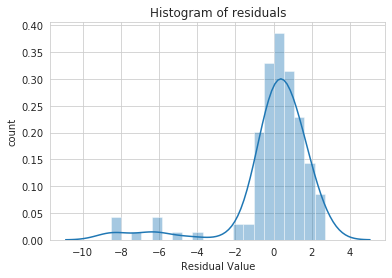

In [61]:
resd = np.subtract(y_test, y_predicted).to_numpy()
sns.distplot(resd)
plt.title('Histogram of residuals')
plt.xlabel('Residual Value')
plt.ylabel('count')

Text(0, 0.5, 'Residual')

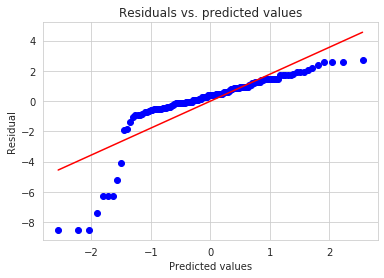

In [63]:
import scipy.stats as ss

ss.probplot(resd.flatten(),plot= plt)
plt.title('Residuals vs. predicted values')
plt.xlabel('Predicted values')
plt.ylabel('Residual')

Text(0, 0.5, 'Residual')

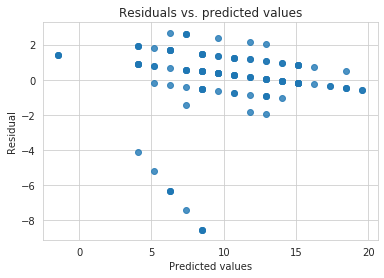

In [66]:
sns.regplot(y_predicted, resd, fit_reg = False)
plt.title('Residuals vs. predicted values')
plt.xlabel('Predicted values')
plt.ylabel('Residual')

The residuals vs predicted values plot shows us that the our model is best at predicting higher grades. The values of the residuals get lower as the grades are greater.  

The model might be resonable to predict the students grades. 